In [2]:
# Read the CSV file into a data frame
df <- read.csv("data-agg.csv", header = TRUE)

# Convert 'person' and 'coin' columns to factors
df$person <- factor(df$person)
df$coin <- factor(df$coin)

# View the first few rows of the data frame to verify
head(df)

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin
,<int>,<int>,<int>,<int>,<fct>,<fct>
1,244,240,485,515,frantisekB,20DEM-silver
2,260,245,505,495,frantisekB,1CZK
3,209,260,469,531,frantisekB,5CZK
4,530,495,1021,979,frantisekB,0.25USD
5,533,507,1039,961,frantisekB,10CZK
6,745,751,1493,1507,frantisekB,0.50EUR


In [31]:
df

heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin
<int>,<int>,<int>,<int>,<fct>,<fct>
244,240,485,515,frantisekB,20DEM-silver
260,245,505,495,frantisekB,1CZK
209,260,469,531,frantisekB,5CZK
530,495,1021,979,frantisekB,0.25USD
533,507,1039,961,frantisekB,10CZK
745,751,1493,1507,frantisekB,0.50EUR
975,971,1948,1952,frantisekB,1EUR
2132,2126,4262,4334,ingeborgR,2HRK
2215,1965,4177,4257,alexandraS,1MXN


In [3]:
# Aggregate data for Starting Heads Up
success_heads_up <- df$heads_heads
trials_heads_up <- df$N_start_heads_up

# Aggregate data for Starting Tails Up
success_tails_up <- df$N_start_tails_up - df$tails_heads
trials_tails_up <- df$N_start_tails_up

# Display the aggregated data
cat("Starting Heads Up:\n")
cat("Total Successes (Heads):", success_heads_up, "\n")
cat("Total Trials:", trials_heads_up, "\n\n")

cat("Starting Tails Up:\n")
cat("Total Successes (Heads):", success_tails_up, "\n")
cat("Total Trials:", trials_tails_up, "\n")


Starting Heads Up:
Total Successes (Heads): 244 260 209 530 533 745 975 2132 2215 1769 2349 1875 301 1467 152 1517 386 384 381 380 376 769 364 395 390 514 762 505 495 752 728 687 752 802 449 862 342 416 503 188 623 380 504 382 356 3903 483 778 265 285 126 491 241 148 247 249 758 259 289 284 255 243 276 381 229 244 248 265 238 224 278 78 206 243 245 275 43 655 253 415 240 241 261 248 215 233 233 23 261 566 235 235 253 279 231 245 250 93 223 256 241 262 233 29 244 253 231 228 244 254 245 264 251 252 247 277 244 301 206 144 271 257 252 240 316 224 75 236 232 210 242 223 247 260 236 158 188 187 278 221 262 255 272 261 239 230 261 174 278 257 248 246 253 225 511 243 138 260 269 266 254 87 267 252 250 221 266 273 93 253 263 262 262 78 269 238 248 121 237 230 251 224 279 1269 1318 510 523 506 525 482 500 540 251 260 758 262 260 1073 802 740 637 276 1589 2095 256 283 517 782 233 775 257 
Total Trials: 485 505 469 1021 1039 1493 1948 4262 4177 3463 4624 3645 528 2922 298 2988 769 756 758 751 74

In [4]:
# Define the log-likelihood function
log_likelihood <- function(params, successes, trials) {
  p <- params[1]      # p parameter
  nu <- params[2]     # nu parameter
  
  # Ensure that p is between 0 and 1, and nu is positive
  if (p <= 0 || p >= 1 || nu <= 0) {
    return(-Inf)  # Return negative infinity to penalize invalid parameters
  }
  
  # Compute the log-likelihood
  ll <- sum(
    lchoose(trials, successes) + 
      lbeta(p * nu + successes, (1 - p) * nu + trials - successes) - 
      lbeta(p * nu, (1 - p) * nu)
  )
  
  return(ll)
}


In [5]:
neg_loglik <- function(params, successes, trials) {
  -log_likelihood(params, successes, trials)
}

In [6]:
# Initial guesses for p and nu
initial_params <- c(p = 0.5, nu = 0.1)

# Perform optimization for Starting Heads Up
optim_heads_up <- optim(
  par = initial_params,
  neg_loglik,
  successes = success_heads_up, 
  trials = trials_heads_up,
  method = "L-BFGS-B",
  lower = c(0.001, 1),  # Lower bounds for p and nu
  upper = c(0.9999, 50000)       # Upper bounds for p and nu
)

# Extract the estimates
estimate_heads_up <- optim_heads_up$par
cat("Estimates for Starting Heads Up:\n")
cat("p =", estimate_heads_up[1], "\n")
cat("nu =", estimate_heads_up[2], "\n\n")


Estimates for Starting Heads Up:
p = 0.5074629 
nu = 3520.592 



In [7]:
# Perform optimization for Starting Tails Up
optim_tails_up <- optim(
  par = initial_params,
  fn = function(params) -log_likelihood(params, success_tails_up, trials_tails_up),
  method = "L-BFGS-B",
  lower = c(0.0001, 0.0001),  # Lower bounds for p and nu
  upper = c(0.9999, 1e12)       # Upper bounds for p and nu
)

# Extract the estimates
estimate_tails_up <- optim_tails_up$par
cat("Estimates for Starting Tails Up:\n")
cat("p =", estimate_tails_up[1], "\n")
cat("nu =", estimate_tails_up[2], "\n")


Estimates for Starting Tails Up:
p = 0.5065539 
nu = 944.8355 


In [8]:
1 - 0.5065539 

[1] 0.4934461

In [9]:
# Define the negative log-likelihood for Model M0
neg_log_likelihood_M0 <- function(nu, r, m) {
  # Ensure nu is positive
  if (nu <= 0) {
    return(Inf)  # Penalize invalid parameters
  }
  
  # Calculate log-likelihood components for each observation
  ll <- sum(
    lchoose(m, r) + 
      lbeta(nu / 2 + r, nu / 2 + m - r) - 
      lbeta(nu / 2, nu / 2)
  )
  
  return(-ll)  # Negative for minimization
}


In [10]:
# Initial guesses for each model
initial_M0 <- 10  # Starting guess for nu in M0
initial_M1 <- c(p = 0.5, nu = 10)  # Starting guesses for p and nu in M1
initial_M2 <- c(p1 = 0.5, nu1 = 10, p2 = 0.5, nu2 = 10)  # Starting guesses for M2

# Set reasonable upper bounds for nu to prevent overestimation
upper_bound_M0 <- 100000
upper_bound_M1 <- 100000
upper_bound_M2 <- 100000


In [11]:
# Perform optimization for Model M0
optim_M0 <- optim(
  par = initial_M0,
  fn = neg_log_likelihood_M0,
  r = c(success_heads_up, success_tails_up),
  m = c(trials_heads_up, trials_tails_up),
  method = "Brent",
  lower = 0.1,      # Avoid zero or negative nu
  upper = upper_bound_M0
)

# Check convergence for M0
if (optim_M0$convergence == 0) {
  cat("Optimization for Model M0 converged successfully.\n")
} else {
  cat("Optimization for Model M0 did not converge.\n")
}

# Extract estimates for M0
nu_M0_est <- optim_M0$par
log_likelihood_M0 <- -optim_M0$value

cat("Model M0 (a = b, p = 0.5):\n")
cat("Estimated nu:", nu_M0_est, "\n")
cat("Log-Likelihood:", log_likelihood_M0, "\n\n")


Optimization for Model M0 converged successfully.
Model M0 (a = b, p = 0.5):
Estimated nu: 1115.382 
Log-Likelihood: -1785.655 



In [12]:
# Define the negative log-likelihood for Model M1
neg_log_likelihood_M1 <- function(params, r, m) {
  p <- params[1]
  nu <- params[2]
  
  # Ensure p is between 0 and 1, and nu is positive
  if (p <= 0 || p >= 1 || nu <= 0) {
    return(Inf)  # Penalize invalid parameters
  }
  
  # Calculate log-likelihood components for each observation
  ll <- sum(
    lchoose(m, r) + 
      lbeta(p * nu + r, (1 - p) * nu + m - r) - 
      lbeta(p * nu, (1 - p) * nu)
  )
  
  return(-ll)  # Negative for minimization
}


In [13]:
# Define the negative log-likelihood for Model M2
neg_log_likelihood_M2 <- function(params, r_heads_up, m_heads_up, r_tails_up, m_tails_up) {
  p1 <- params[1]
  nu1 <- params[2]
  p2 <- params[3]
  nu2 <- params[4]
  
  # Ensure p1 and p2 are between 0 and 1, and nu1 and nu2 are positive
  if (p1 <= 0 || p1 >= 1 || nu1 <= 0 || p2 <= 0 || p2 >= 1 || nu2 <= 0) {
    return(Inf)  # Penalize invalid parameters
  }
  
  # Calculate log-likelihood components for "Heads Up"
  ll_heads_up <- sum(
    lchoose(m_heads_up, r_heads_up) + 
      lbeta(p1 * nu1 + r_heads_up, (1 - p1) * nu1 + m_heads_up - r_heads_up) - 
      lbeta(p1 * nu1, (1 - p1) * nu1)
  )
  
  # Calculate log-likelihood components for "Tails Up"
  ll_tails_up <- sum(
    lchoose(m_tails_up, r_tails_up) + 
      lbeta(p2 * nu2 + r_tails_up, (1 - p2) * nu2 + m_tails_up - r_tails_up) - 
      lbeta(p2 * nu2, (1 - p2) * nu2)
  )
  
  # Total log-likelihood
  ll_total <- ll_heads_up + ll_tails_up
  
  return(-ll_total)  # Negative for minimization
}


In [14]:
# Perform optimization for Model M1
optim_M1 <- optim(
  par = initial_M1,
  fn = neg_log_likelihood_M1,
  r = c(success_heads_up, success_tails_up),
  m = c(trials_heads_up, trials_tails_up),
  method = "L-BFGS-B",
  lower = c(0.01, 0.1),
  upper = c(0.99, upper_bound_M1)
)

# Check convergence for M1
if (optim_M1$convergence == 0) {
  cat("Optimization for Model M1 converged successfully.\n")
} else {
  cat("Optimization for Model M1 did not converge.\n")
}

# Extract estimates for M1
p_M1_est <- optim_M1$par[1]
nu_M1_est <- optim_M1$par[2]
log_likelihood_M1 <- -optim_M1$value

cat("Model M1 (a != b, common p and nu):\n")
cat("Estimated p:", p_M1_est, "\n")
cat("Estimated nu:", nu_M1_est, "\n")
cat("Log-Likelihood:", log_likelihood_M1, "\n\n")


Optimization for Model M1 converged successfully.
Model M1 (a != b, common p and nu):
Estimated p: 0.5069844 
Estimated nu: 1469.274 
Log-Likelihood: -1767.721 



In [15]:
# Perform optimization for Model M2
optim_M2 <- optim(
  par = initial_M2,
  fn = neg_log_likelihood_M2,
  r_heads_up = success_heads_up,
  m_heads_up = trials_heads_up,
  r_tails_up = success_tails_up,
  m_tails_up = trials_tails_up,
  method = "L-BFGS-B",
  lower = c(0.01, 0.1, 0.01, 0.1),
  upper = c(0.99, upper_bound_M2, 0.99, upper_bound_M2)
)

# Check convergence for M2
if (optim_M2$convergence == 0) {
  cat("Optimization for Model M2 converged successfully.\n")
} else {
  cat("Optimization for Model M2 did not converge.\n")
}

# Extract estimates for M2
p1_M2_est <- optim_M2$par[1]
nu1_M2_est <- optim_M2$par[2]
p2_M2_est <- optim_M2$par[3]
nu2_M2_est <- optim_M2$par[4]
log_likelihood_M2 <- -optim_M2$value

cat("Model M2 (different p and nu for each condition):\n")
cat("Estimated p1 (Heads Up):", p1_M2_est, "\n")
cat("Estimated nu1 (Heads Up):", nu1_M2_est, "\n")
cat("Estimated p2 (Tails Up):", p2_M2_est, "\n")
cat("Estimated nu2 (Tails Up):", nu2_M2_est, "\n")
cat("Log-Likelihood:", log_likelihood_M2, "\n\n")


Optimization for Model M2 converged successfully.
Model M2 (different p and nu for each condition):
Estimated p1 (Heads Up): 0.5074544 
Estimated nu1 (Heads Up): 1476.593 
Estimated p2 (Tails Up): 0.506515 
Estimated nu2 (Tails Up): 1464.564 
Log-Likelihood: -1767.588 



In [16]:
# Calculate differences in log-likelihoods
delta_M1_M0 <- log_likelihood_M1 - log_likelihood_M0
delta_M2_M0 <- log_likelihood_M2 - log_likelihood_M0
delta_M2_M1 <- log_likelihood_M2 - log_likelihood_M1

# Compute Bayes Factors
BF_M1_M0 <- exp(delta_M1_M0)
BF_M2_M0 <- exp(delta_M2_M0)
BF_M2_M1 <- exp(delta_M2_M1)

# Display Bayes Factors
cat("Bayes Factor BF_M1_M0 (M1 vs M0):", BF_M1_M0, "\n")
cat("Bayes Factor BF_M2_M0 (M2 vs M0):", BF_M2_M0, "\n")
cat("Bayes Factor BF_M2_M1 (M2 vs M1):", BF_M2_M1, "\n\n")


Bayes Factor BF_M1_M0 (M1 vs M0): 61460070 
Bayes Factor BF_M2_M0 (M2 vs M0): 70261900 
Bayes Factor BF_M2_M1 (M2 vs M1): 1.143212 



Now it seems that M2 is the most preferable model according to the Bayes Factors approach. 

In [17]:
compute_posterior_M2 <- function(p, nu, r, m) {
  alpha_post <- p * nu + r
  beta_post <- (1 - p) * nu + m - r
  mean_post <- alpha_post / (alpha_post + beta_post)
  var_post <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))
  return(list(mean = mean_post, variance = var_post))
}

# Compute and display posterior means and variances for each observation under M2
cat("Posterior Means and Variances under Model M2:\n\n")

for (i in 1:nrow(df)) {
  # Heads Up condition
  r_heads <- success_heads_up[i]
  m_heads <- trials_heads_up[i]
  
  posterior_heads <- compute_posterior_M2(p1_M2_est, nu1_M2_est, r_heads, m_heads)
  
  # Tails Up condition
  r_tails <- success_tails_up[i]
  m_tails <- trials_tails_up[i]
  
  posterior_tails <- compute_posterior_M2(p2_M2_est, nu2_M2_est, r_tails, m_tails)
  
  # Display results
  cat(paste("Observation", i, ":\n"))
  cat("  Heads Up - Posterior Mean:", round(posterior_heads$mean, 4), "\n")
  cat("  Heads Up - Posterior Variance:", signif(posterior_heads$variance, 4), "\n")
  cat("  Tails Up - Posterior Mean:", round(posterior_tails$mean, 4), "\n")
  cat("  Tails Up - Posterior Variance:", signif(posterior_tails$variance, 4), "\n\n")
}


Posterior Means and Variances under Model M2:

Observation 1 :
  Heads Up - Posterior Mean: 0.5064 
  Heads Up - Posterior Variance: 0.0001274 
  Tails Up - Posterior Mean: 0.5137 
  Tails Up - Posterior Variance: 0.0001261 

Observation 2 :
  Heads Up - Posterior Mean: 0.5093 
  Heads Up - Posterior Variance: 0.0001261 
  Tails Up - Posterior Mean: 0.5061 
  Tails Up - Posterior Variance: 0.0001275 

Observation 3 :
  Heads Up - Posterior Mean: 0.4926 
  Heads Up - Posterior Variance: 0.0001284 
  Tails Up - Posterior Mean: 0.5075 
  Tails Up - Posterior Variance: 0.0001252 

Observation 4 :
  Heads Up - Posterior Mean: 0.5122 
  Heads Up - Posterior Variance: 1e-04 
  Tails Up - Posterior Mean: 0.5017 
  Tails Up - Posterior Variance: 0.0001023 

Observation 5 :
  Heads Up - Posterior Mean: 0.5097 
  Heads Up - Posterior Variance: 9.93e-05 
  Tails Up - Posterior Mean: 0.493 
  Tails Up - Posterior Variance: 0.000103 

Observation 6 :
  Heads Up - Posterior Mean: 0.5032 
  Heads Up -

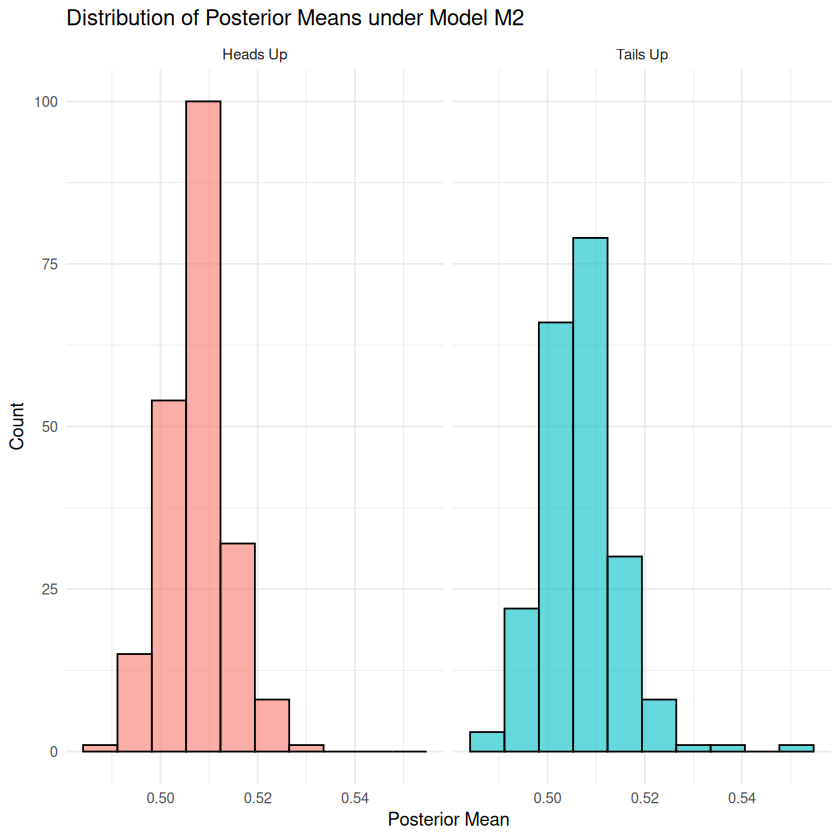

In [19]:
# Load necessary libraries
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}

# Function to compute posterior mean and variance under Model M2
compute_posterior_M2 <- function(p, nu, r, m) {
  alpha_post <- p * nu + r
  beta_post <- (1 - p) * nu + m - r
  mean_post <- alpha_post / (alpha_post + beta_post)
  var_post <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))
  return(list(mean = mean_post, variance = var_post))
}

# Initialize vectors to store posterior means and variances
posterior_means_heads_up <- numeric(nrow(df))
posterior_vars_heads_up <- numeric(nrow(df))
posterior_means_tails_up <- numeric(nrow(df))
posterior_vars_tails_up <- numeric(nrow(df))

# Compute and store posterior means and variances for each observation under M2
for (i in 1:nrow(df)) {
  # Heads Up condition
  r_heads <- success_heads_up[i]
  m_heads <- trials_heads_up[i]
  
  posterior_heads <- compute_posterior_M2(p1_M2_est, nu1_M2_est, r_heads, m_heads)
  
  # Tails Up condition
  r_tails <- success_tails_up[i]
  m_tails <- trials_tails_up[i]
  
  posterior_tails <- compute_posterior_M2(p2_M2_est, nu2_M2_est, r_tails, m_tails)
  
  # Store the results
  posterior_means_heads_up[i] <- posterior_heads$mean
  posterior_vars_heads_up[i] <- posterior_heads$variance
  posterior_means_tails_up[i] <- posterior_tails$mean
  posterior_vars_tails_up[i] <- posterior_tails$variance
}

# Create a data frame for plotting
posterior_data <- data.frame(
  Observation = 1:nrow(df),
  Condition = rep(c("Heads Up", "Tails Up"), each = nrow(df)),
  Posterior_Mean = c(posterior_means_heads_up, posterior_means_tails_up),
  Posterior_Variance = c(posterior_vars_heads_up, posterior_vars_tails_up)
)

# Calculate observed proportions
observed_heads_up <- success_heads_up / trials_heads_up
observed_tails_up <- success_tails_up / trials_tails_up

# Add observed proportions to the data frame
posterior_data$Observed_Proportion <- c(observed_heads_up, observed_tails_up)

# Plot histograms of posterior means for Heads Up and Tails Up
ggplot(posterior_data, aes(x = Posterior_Mean, fill = Condition)) +
  geom_histogram(alpha = 0.6, position = 'identity', bins = 10, color = "black") +
  facet_wrap(~Condition) +
  theme_minimal() +
  labs(title = "Distribution of Posterior Means under Model M2",
       x = "Posterior Mean",
       y = "Count") +
  theme(legend.position = "none")